In [17]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import numpy as np

In [6]:
model = keras.models.load_model('Models/advanced_model')

### Visualizing Filters or Feature Detectors in a CNN

conv2d (None, 100, 100, 16)
16


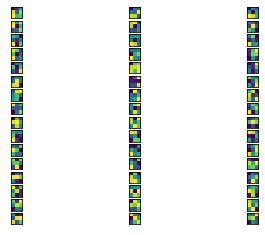

conv2d_1 (None, 100, 100, 32)
32


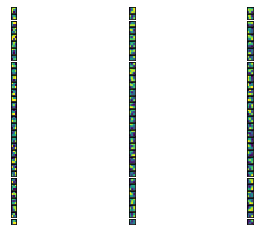

conv2d_2 (None, 100, 100, 64)
64


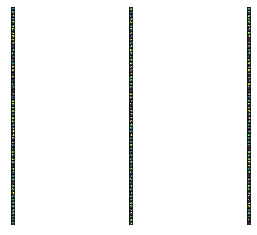

In [13]:
#Iterate thru all the layers of the model
for layer in model.layers[0:8]:
    if 'conv' in layer.name:
        weights, bias= layer.get_weights()
        print(layer.name, layer.output_shape)
        
        #normalize filter values between  0 and 1 for visualization
        f_min, f_max = weights.min(), weights.max()
        filters = (weights - f_min) / (f_max - f_min)  
        print(filters.shape[3])
        filter_cnt=1
        
        #plotting all the filters
        for i in range(filters.shape[3]):
            #get the filters
            filt=filters[:,:,:, i]
            #plotting each of the channel, color image RGB channels
            for j in range(filters.shape[0]):
                ax= plt.subplot(filters.shape[3], filters.shape[0], filter_cnt)
                ax.set_xticks([])
                ax.set_yticks([])
                plt.imshow(filt[:,:, j])
                filter_cnt+=1
        plt.show()

### Visualizing Feature maps or Activation maps generated in a CNN

(1, 100, 100, 16)
(1, 100, 100, 16)
(1, 100, 100, 32)
(1, 100, 100, 32)
(1, 100, 100, 64)
(1, 100, 100, 64)
(1, 100, 100, 64)


C:\Users\henni\AppData\Local\Temp\ipykernel_2032\3858516309.py:37: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std ()
C:\Users\henni\AppData\Local\Temp\ipykernel_2032\3858516309.py:37: RuntimeWarning: divide by zero encountered in true_divide
  x /= x.std ()


(1, 100, 100, 64)
(1, 50, 50, 64)
(1, 50, 50, 64)
(1, 50, 50, 64)
(1, 50, 50, 128)
(1, 50, 50, 128)
(1, 50, 50, 128)
(1, 50, 50, 128)
(1, 25, 25, 128)
(1, 25, 25, 128)
(1, 25, 25, 128)
(1, 25, 25, 256)
(1, 25, 25, 256)
(1, 25, 25, 256)
(1, 25, 25, 256)
(1, 13, 13, 256)
(1, 13, 13, 256)


C:\Users\henni\AppData\Local\Temp\ipykernel_2032\3858516309.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure( figsize=(scale * n_features, scale) )


(1, 13, 13, 256)
(1, 13, 13, 512)
(1, 13, 13, 512)
(1, 13, 13, 512)
(1, 13, 13, 512)
(1, 7, 7, 512)
(1, 7, 7, 512)
(1, 7, 7, 512)
(1, 7, 7, 728)
(1, 7, 7, 728)
(1, 7, 7, 728)
(1, 35672)
(1, 8)


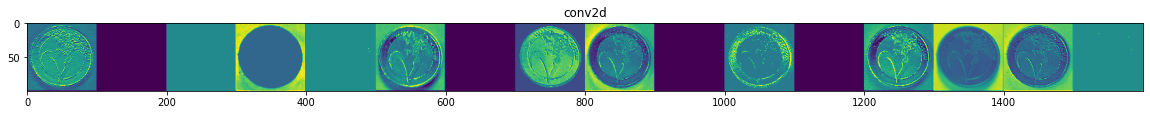

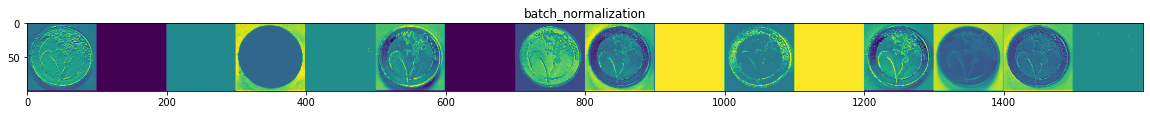

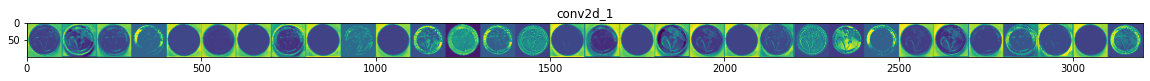

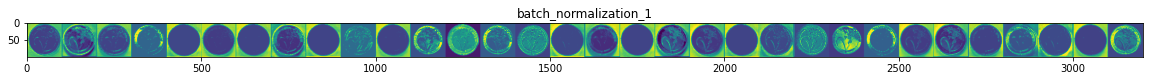

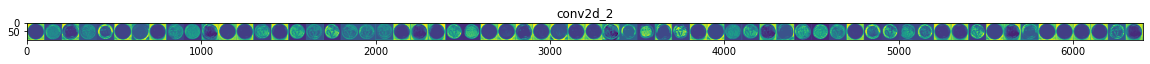

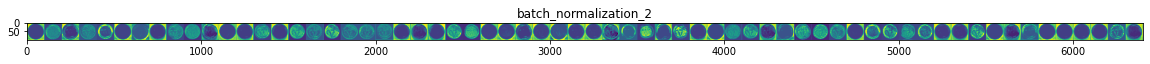

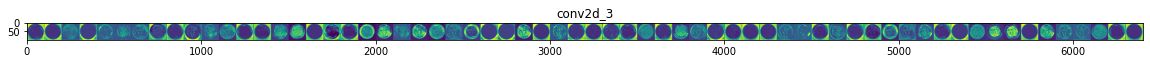

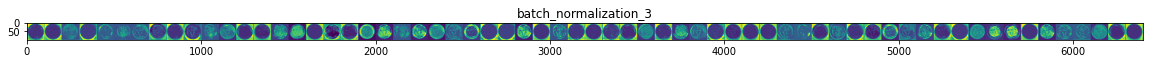

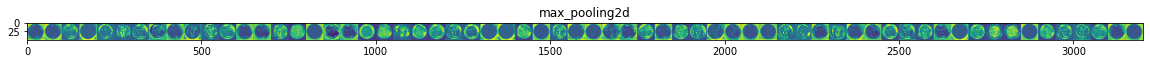

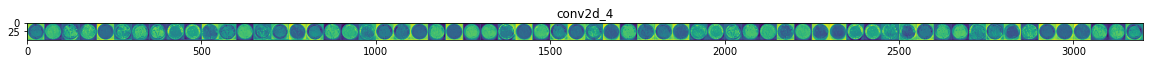

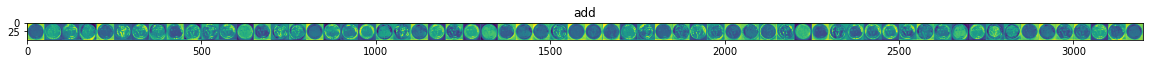

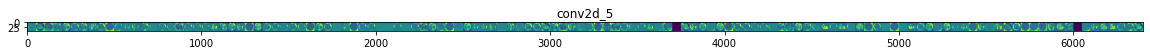

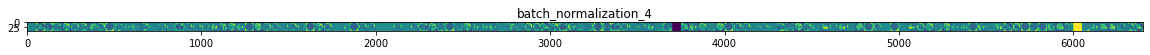

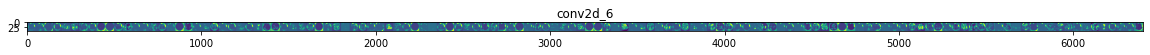

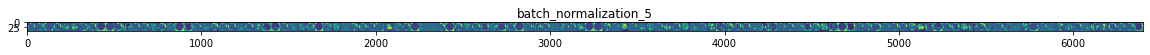

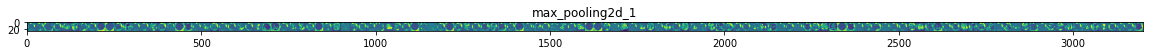

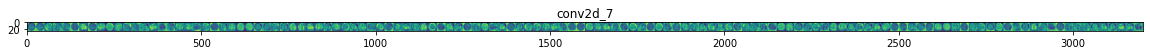

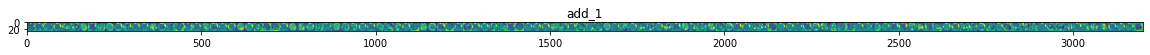

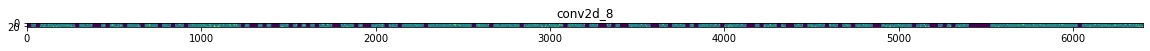

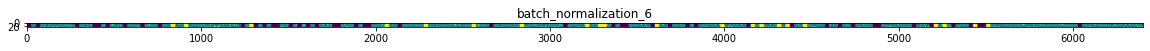

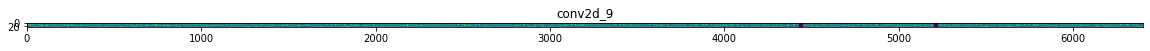

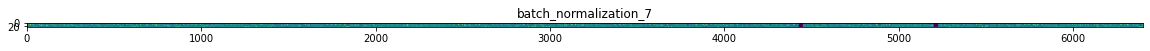

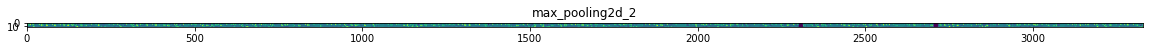

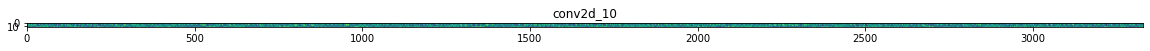

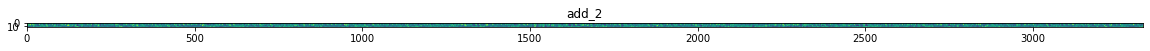

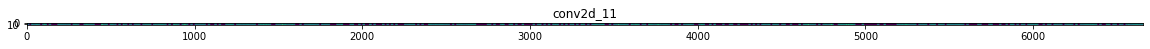

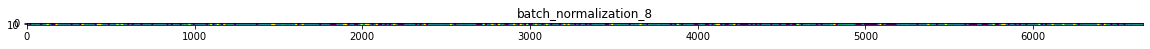

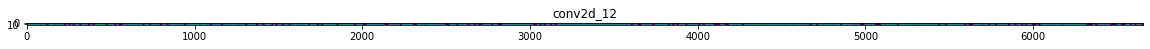

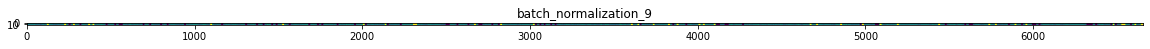

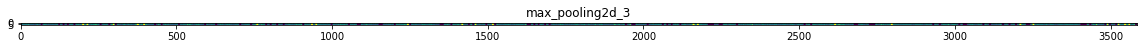

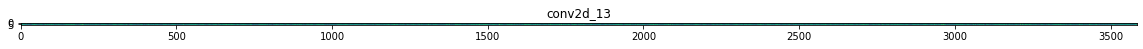

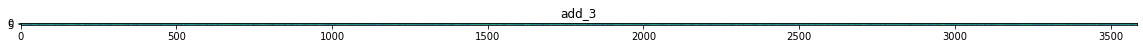

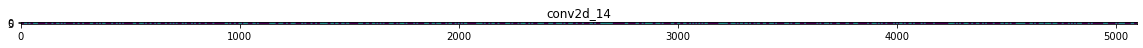

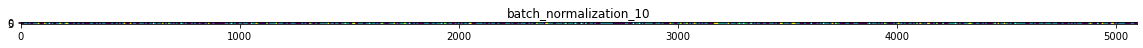

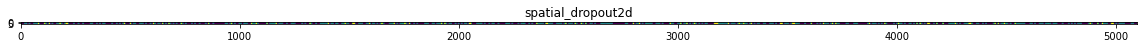

In [29]:
img_path='big data set/original/2e/IMG_20190611_130947_0.jpg' #Coin

# Define a new Model, Input= image 
# Output= intermediate representations for all layers in the  
# previous model after the first.
successive_outputs = [layer.output for layer in model.layers[3:]] #[n:](n=1,2,3) random_flip caused error Muss vllt. weiter angepasst werden
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
#Load the input image
img = load_img(img_path, target_size=(200, 200))
# Convert ht image to Array of dimension (150,150,3)
x   = img_to_array(img)                           
x   = x.reshape((1,) + x.shape)
# Rescale by 1/255
#x /= 255.0
# Let's run input image through our vislauization network
# to obtain all intermediate representations for the image.
successive_feature_maps = visualization_model.predict(x)
# Retrieve are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[3:]]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:
    
    # Plot Feature maps for the conv / maxpool layers, not the fully-connected layers
   
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    # Postprocess the feature to be visually palatable
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      # Tile each filter into a horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
# Display the grid
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )